In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P -O /tmp/sentiment.csv

--2020-06-12 10:59:51--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 74.125.197.102, 74.125.197.100, 74.125.197.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.197.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6a37e9lcore3npbgf7ajicv8m1da2gf/1591959525000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-06-12 10:59:51--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6a37e9lcore3npbgf7ajicv8m1da2gf/1591959525000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|173.1

In [0]:
import pandas as pd

dataset = pd.read_csv('/tmp/sentiment.csv')

# Extract out sentences and labels
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [4]:
# Print some example sentences and labels
for x in range(5):
  print(sentences[x])
  print(labels[x])
  print("\n")

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1


Great for the jawbone.
1


Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
0


The mic is great.
1




# Create a subwords dataset

In [5]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

print("Vocab size is ", tokenizer.vocab_size)


Vocab size is  999


In [6]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [7]:
# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


# Replace sentence data with encoded subwords

In [0]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [9]:
# Check the sentences are appropriately replaced
print(sentences[5])

[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


# Final pre-processing

In [0]:
import numpy as np

In [0]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

sequences_padded = pad_sequences(sentences, maxlen= max_length, padding= padding_type, truncating= trunc_type)

training_size = int(len(sentences)* 0.8)

training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


# Create the model using an Embedding

In [17]:
embedding_dim = 16

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(6, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


# train the model

In [18]:
epochs = 30
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(training_sequences, training_labels_final, epochs = epochs, validation_data=(testing_sequences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5104 - val_loss: 0.6968 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5223 - val_loss: 0.6975 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5229 - val_loss: 0.6994 - val_accuracy: 0.4211
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5643 - val_loss: 0.6942 - val_accuracy: 0.4662
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6070 - val_loss: 0.6723 - val_accuracy: 0.5388
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6880 - val_loss: 0.6643 - val_accuracy: 0.5439
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.7376 - val_loss: 0.6413 - val_accuracy: 0.6216
Epoch 8/30
50/50 [==

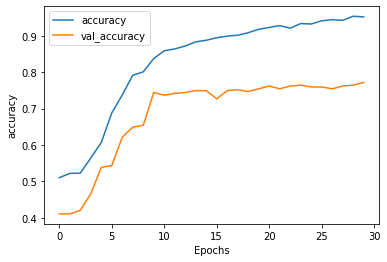

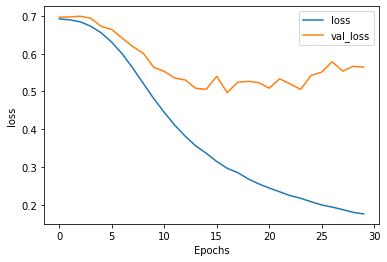

In [20]:
# plot accuracy and loss
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Define a function to predict the sentiment of reviews

In [0]:
def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
  new_sequences = []
  
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type='post' 
  padding_type='post'

  new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type) 

    
  classes = model.predict(new_reviews_padded)

  # The closer the class is to 1, the more positive the review is
  for x in range(len(new_sentences)):
    
    # We can see the padded sequence if desired
    # Print the sequence
    if (show_padded_sequence):
      print(new_reviews_padded[x])
    # Print the review as text
    print(new_sentences[x])
    # Print its predicted class
    print(classes[x])
    print("\n")

In [27]:
# Use the model to predict some reviews   
fake_reviews = ["I love this phone", 
                "Everything was cold",
                "Everything was hot exactly as I wanted", 
                "Everything was green", 
                "the host seated us immediately",
                "they gave us free chocolate cake", 
                "we couldn't hear each other talk because of the shouting in the kitchen"
              ]

predict_review(model, fake_reviews)

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.91189325]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.10135077]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.2547633]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.09295028]


[  1 109 228 540 237 635 24

# Define a function to train and show the results of models with different layers

In [0]:
def fit_model_now (model) :
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  history = model.fit(training_sequences, training_labels_final, epochs=epochs, 
                      validation_data=(testing_sequences, testing_labels_final))
  return history

def plot_results (history):
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

def fit_model_and_show_results (model, sentences):
  history = fit_model_now(model)
  plot_results(history)
  predict_review(model, sentences)

# Add a bidirectional LSTM

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 1s 23ms/step - loss: 0.6917 - accuracy: 0.5097 - val_loss: 0.6987 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 9ms/step - loss: 0.6632 - accuracy: 0.5775 - val_los

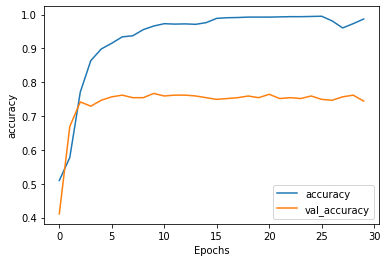

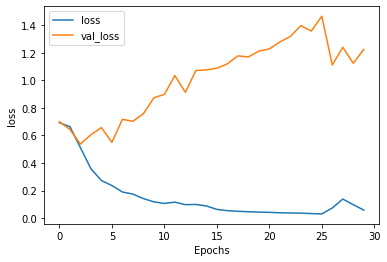

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9981055]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.01766588]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.75263554]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.02723778]


[  1 109 228 540 237 635 24

In [32]:
# Define the model
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model and then show the predictions for our extra sentences
fit_model_and_show_results(model_bidi_lstm, fake_reviews)

# Use multiple bidirectional layers


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 2s 35ms/step - loss: 0.6913 - accuracy: 0.5235 - val_loss: 0.695

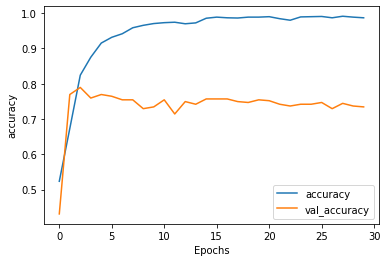

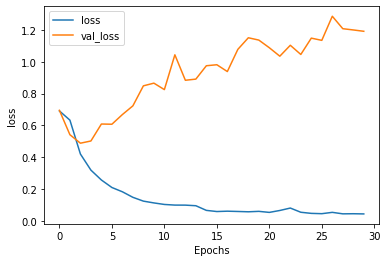

[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9975261]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.00697816]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.8706689]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was green
[0.01326069]


[  1 109 228 540 237 635 241

In [33]:
model_multiple_bidi_lstm = tf.keras.Sequential([
                                                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
                                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                                                tf.keras.layers.Dense(6, activation='relu'),
                                                tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)


# Compare predictions for all the models

In [0]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             "on my birthday i didn't got good food"
             ] 

In [36]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequence=False)

 Embeddings only:
lovely
[0.92718816]


dreadful
[0.2927036]


stay away
[0.6437672]


everything was hot exactly as I wanted
[0.6950196]


everything was not exactly as I wanted
[0.373923]


they gave us free chocolate cake
[0.7248742]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.05435878]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.28698307]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.7593523]


that place does not have quality meals and it isn't a good place to go for dinner
[0.7995986]


on my birthday i didn't got good food
[0.41569826]




In [37]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequence=False)

 Embeddings only:
lovely
[0.92718816]


dreadful
[0.2927036]


stay away
[0.6437672]


everything was hot exactly as I wanted
[0.6950196]


everything was not exactly as I wanted
[0.373923]


they gave us free chocolate cake
[0.7248742]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.05435878]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.28698307]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.7593523]


that place does not have quality meals and it isn't a good place to go for dinner
[0.7995986]


on my birthday i didn't got good food
[0.41569826]




In [38]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequence=False)

 With two bidirectional LSTMs:
lovely
[0.9969658]


dreadful
[0.00912004]


stay away
[0.00813607]


everything was hot exactly as I wanted
[0.994222]


everything was not exactly as I wanted
[0.07664058]


they gave us free chocolate cake
[0.99062705]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.00520802]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.01731968]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.99821776]


that place does not have quality meals and it isn't a good place to go for dinner
[0.00984503]


on my birthday i didn't got good food
[0.97649753]


